# Modelo teórico:
Uma das 3 portas, aleatóriamente possue o prêmio, digamos p. Escolhemos uma das 3 portas, digamos e. 
Portanto existem duas situações:

## Situação 1 (p == e):

Essa situação ocorre quando de primeira já estamos na porta correta. Assim, essa situação possui uma probabilidade de 1/3 de ocorrer.

Nela, uma das duas portas vazias são eliminadas. Logo, se trocarmos para outra porta, perderemos. Assim, nossa probabilidade de ganhar não trocando de porta é de 100% nesse caso.

## Situação 2 (p != e):

Essa situação ocorre quando escolhemos uma porta que não possui o prêmio. Assim, essa situação possui uma probabilidade de 2/3 de ocorrer.

Nela, a outra porta (que nao escolhemos e que não possui o prêmio) é eliminada. Portanto, estamos na única vazia e devemos trocar para ganhar. Probabilidade de vitória trocando nesse caso é de 100%.

## Conclusão:

A probabilidade de ganharmos trocando de porta é:

    P( trocar | p == e ) + P( trocar | p != e ) = (1/3 * 0) + (2/3 * 1) = 2/3
    
Enquanto a probabilidade de ganharmos não trocando é:

    P( não trocar | p == e ) + P( não trocar | p != e ) = (1/3 * 1) + (2/3 * 0) = 1/3

# Experimento:

Depois de repetir 20000, obtivemos:


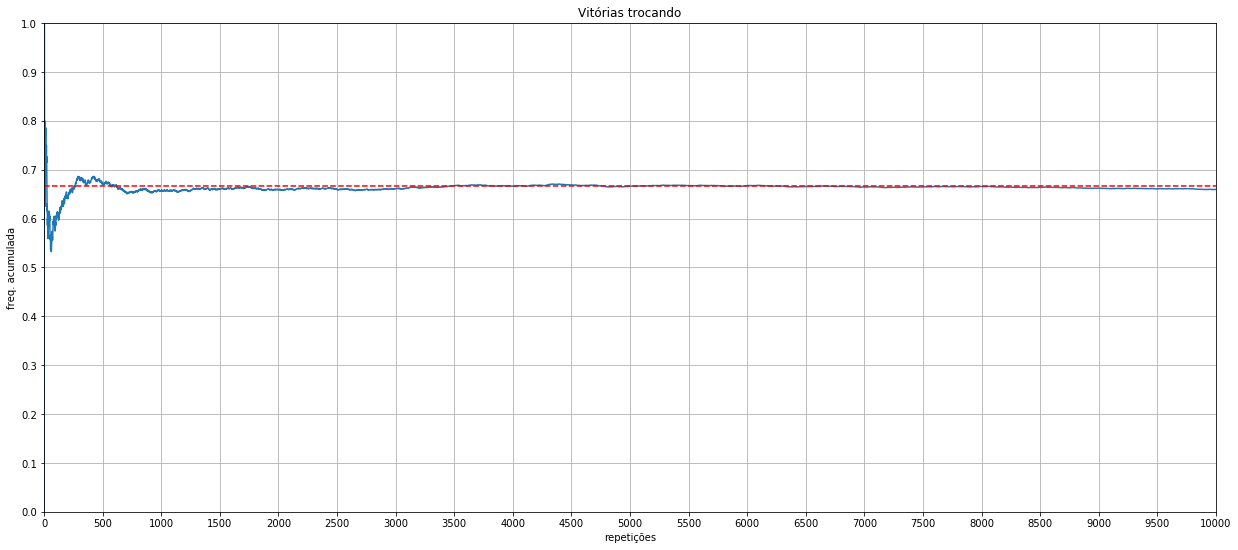

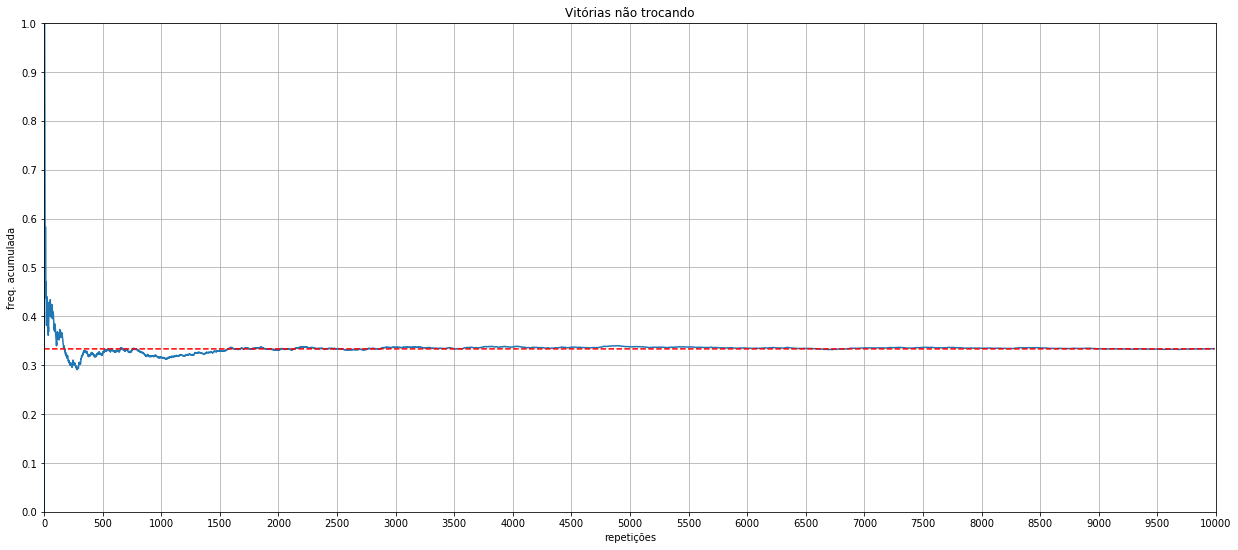

In [15]:
from random import randint
import matplotlib.pyplot as plt

#número de vezes que repetiremos o experimento
n = 20000

#vetores com a frequência acumulada de vitórias
trocou = [0]
n_trocou = [0]

for i in range(1, n):
    #colocamos o premio
    premio = randint(0,2)

    #escolhemos a porta
    escolhido = randint(0,2)

    #removemos uma porta (aleatória) vazia e que não tenhamos escolhido
    removido = randint(0,2)
    while removido == escolhido or removido == premio:
        removido = randint(0,2)

    #troca = 1, não troca = 0
    if randint(0,1):
        #decidimos para qual ele vai mudar
        #impedindo que ele mude para o que foi removido
        if removido == 0:
            if escolhido == 1:
                escolhido = 2
            else:
                escolhido = 1
        elif removido == 1:
            if escolhido == 0:
                escolhido = 2
            else:
                escolhido = 0
        else:
            if escolhido == 0:
                escolhido = 1
            else:
                escolhido = 0

        #verificamos se ele ganhou
        if escolhido == premio:
            trocou.append(trocou[-1]+ 1)
        else:
            trocou.append(trocou[-1])

    #caso ele não tenha trocado de porta, verificamos se ele ganhou
    else:
        if escolhido == premio:
            n_trocou.append(n_trocou[-1] + 1)
        else:
            n_trocou.append(n_trocou[-1])

#listas com o modelo teorico
mod_teo_trocou = [2/3]
mod_teo_n_trocou = [1/3]
            
#calcular a frequencia acumulada em cada caso
for i in range(1, len(trocou)):
    trocou[i] = trocou[i]/i
    mod_teo_trocou.append(2/3)
for i in range(1, len(n_trocou)):
    n_trocou[i] = n_trocou[i]/i
    mod_teo_n_trocou.append(1/3)
            
#impressão dos resultados
print("Depois de repetir", str(n) + ", obtivemos:")
plt.figure(figsize=(21,9))
plt.plot(trocou)
plt.plot(mod_teo_trocou, 'r--')
plt.xlabel('repetições')
plt.ylabel('freq. acumulada')
plt.title("Vitórias trocando")
plt.axis([0.0, 5050, 0.0, 1.001])
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

#segundo grafico
plt.figure(figsize=(21,9))
plt.plot(n_trocou)
plt.plot(mod_teo_n_trocou, 'r--')
plt.xlabel('repetições')
plt.ylabel('freq. acumulada')
plt.title("Vitórias não trocando")
plt.axis([0.0, 5050, 0.0, 1.001])
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()